### **D2APR: Aprendizado de Máquina e Reconhecimento de Padrões** (IFSP, Campinas) <br/>
**Prof**: Samuel Martins (Samuka) <br/>

<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>. <br/><br/>

#### Custom CSS style

In [1]:
%%html
<style>
.dashed-box {
    border: 1px dashed black !important;
#    font-size: var(--jp-content-font-size1) !important;
}

.dashed-box table {

}

.dashed-box tr {
    background-color: white !important;
}
        
.alt-tab {
    background-color: black;
    color: #ffc351;
    padding: 4px;
    font-size: 1em;
    font-weight: bold;
    font-family: monospace;
}
// add your CSS styling here
</style>

<span style='font-size: 2.5em'><b>California Housing 🏡</b></span><br/>
<span style='font-size: 1.5em'>Predict the median housing price in California districts</span>

<span style="background-color: #ffc351; padding: 4px; font-size: 1em;"><b>Sprint #1</b></span>

<img src="../imgs/california-flag.png" width=300/>

---



## Before starting this notebook
This jupyter notebook is designed for **experimental and teaching purposes**. <br/>
Although it is (relatively) well organized, it aims at solving the _target problem_ by evaluating (and documenting) _different solutions_ for somes steps of the **machine learning pipeline** — see the ***Machine Learning Project Checklist by xavecoding***. <br/>
We tried to make this notebook as literally a _notebook_. Thus, it contains notes, drafts, comments, etc.<br/>

For teaching purposes, some parts of the notebook may be _overcommented_. Moreover, to simulate a real development scenario, we will divide our solution and experiments into **"sprints"** in which each sprint has some goals (e.g., perform _feature selection_, train more ML models, ...). <br/>
The **sprint goal** will be stated at the beginning of the notebook.

A ***final notebook*** (or any other kind of presentation) that compiles and summarizes all sprints — the target problem, solutions, and findings — should be created later.

#### Conventions

<ul>
    <li>💡 indicates a tip. </li>
    <li> ⚠️ indicates a warning message. </li>
    <li><span class='alt-tab'>alt tab</span> indicates and an extra content (<i>e.g.</i>, slides) to explain a given concept.</li>
</ul>

---

## 🎯 Sprint Goals
- Frame the problem
- Get the data
- Data cleaning
- Simple EDA to gain insights
- Initial data preprocessing
- Train a (single) ML algorithm with all features and default hyperparameters
---

### 0. Imports and default settings for plotting

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

## 🔲 1. Frame the Problem

### 📄 1.1. Context
<table align="left" class='dashed-box'>
<tr>
    <td>💡</td>
    <td>If you still do not have the context of the problem or if it is uncler to you, you may search for the subject on the internet, for example, on news sites or academic papers.</td>
</tr>
<tr style="background-color: white !important">
    <td></td>
    <td>This will help you not only to understand the problem better, but also in formulating and writing its context here.</td>
</tr>
</table><br/><br/><br/><br/>
    
The  housing  market  is  an  important,  yet  special,  sector  of  the  national  economy.  Its  importance  is  derived  from  two  main  factors:  the  size  of  the  housing  market  and  the  functions  that  residential  properties  perform.  Residential properties additionally perform a number of important socio-economic functions. They meet the most basic needs of having a place to call home and a sense of security, as well as the needs of a higher order, such as the possibility of forming social ties or meeting the needs of self-realization [1].

**California** is the most populous state in the United States (U.S.) with a population about 39.78 million (July, 2020) [2]. It also the largest economy in U.S., boasting a $3.2 trillion gross state product (GSP) as of 2019. [3]. If California were a sovereign nation (2020), it would rank as the world's fifth largest economy [4].

California has the most expensive and largest housing markets in the U.S. [5]. Apart from having one of the highest numbers of migrant workers, California also holds the highest real estate prices. The average price of a home in California is approximately 2.5 times the median national price [5]. It even surpasses the housing prices of Massachusetts and New York, the two states with the most expensive homes and rental rates [5]. <br/><br/>


**References:** <br/>
[1] Zelazowski, K.. "Housing market cycles in the context of business cycles." Real Estate Management and Valuation 25, no. 3 (2017): 5-14. <br/>
[2] State of California, Department of Finances - https://www.dof.ca.gov/Forecasting/Demographics/Estimates/E-2/ (accessed on 2021-08-19). <br/>
[3] Gross Domestic Product by State, Fourth Quarter and Annual 2019" (PDF). US Department of Commerce, BEA (Bureau of Economic Analysis). <br/>
[4] "Report for Selected Countries and Subjects". International Monetary Fund - https://www.imf.org/en/Publications/SPROLLs/world-economic-outlook-databases  <br/>
[5] 21 Eye-Opening California Real Estate Statistics - https://movity.com/blog/california-real-estate-statistics (accessed on 2021-08-19) <br/><br/>

### 🧠 1.2. Challenge
ML California Housing is a well-established real estate company working on the housing market in California.

#### 🎯 **Objective:**
**Build a machine learning solution to automatically predict the median housing prices in the _districts_ (block groups) of California.** <br/>
These predictions will be used to determine whether it is worth investing in a given area or not.

#### **Baseline:**
Currently, the **district housing prices** are estimated ***manually by experts***: a team gathers up-to-date information about a district and finds out the _median housing price_. 
This is _costly_ and _time-consuming_, and their **estimates are not great**; they often realize that **their estimates were off by more than 20%**.

<table align="left" class="dashed-box">
<tr>
    <td>⚠️</td>
    <td>We will consider a dataset with housing prices of 1990 for learning purposes (see <i>Section 2. Get the Data</i>).</td>
</tr>
</table><br/><br/>

#### **Solution Planning:**
- **Regression problem**
- Metrics:
    - R²
    - Root Mean Squared Error (RMSE)
- Data sources:
    - [1990 California Housing Prices](https://github.com/ageron/handson-ml2/blob/master/datasets/housing/README.md)
- No assumptions
- Project deliverable:
    - A simple exploratory data analysis
    - **A ML system/model** launched in _production_ <br/><br/>

## 💽 2. Get the Data
The considered dataset contains housing prices from the _1990 California census_. It is a dataset provided by the book _"Hands-on machine learning with Scikit-Learn, Keras and TensorFlow: concepts, tools, and techniques to build intelligent systems (A. Géron, 2019)"_ which was adapted from the StatLib repository for teaching purposes.

This dataset is not recent and **should not** be used to predict current California housing prices; more recent data should be used instead. However, it is an excellent one for learning and simulating a real case.

We refer to the [github repository](https://github.com/ageron/handson-ml2/tree/master/datasets/housing) for details about the changes of the dataset.

This dataset does not have legal obligations and sensitive information.

### 2.1. Download the Data
We previously download the dataset from this [github repository](https://github.com/ageron/handson-ml2/blob/master/datasets/housing/housing.csv). However, we could use pandas to read such a remote file directly.

### 2.2. Load the Data

In [4]:
import pandas as pd

housing = pd.read_csv('../datasets/housing.csv')

In [5]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### 2.3. Take a quick look at the data structure

In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Each row corresponds to a _block group of houses_, called here _"district"_ for short, <br/>
Each _district_ is represented by **10 attributes** (9 numeric and 1 categorical). <br/>
- District's location: **_longitude_, _latitude_, _ocean_proximity_**
- **_housing_median_age_**: Median age of a house within the district (a lower number is a newer building)
- **_population_**: Total number of people residing within the district..
- **_households_**: Total number of households (a group of people residing within a home unit) of the district
- **_total_rooms_** and **_total_bedrooms_**: Total number of rooms and bedrooms, respectively, of all home units from the district.
- **_median_income_**: Median income for households within the district (measured in tens of thousands of US Dollars)
- **_median_house_value_**: Median value/price for houses within the ditrict (measured in US Dollars)


There are **20,640 instances** in the dataset (fairly small by ML standards). <br/>
The attribute _total_bedrooms_ has only **20,433 *nonnull* values**, meaning that _207 districts_ are missing this feature.

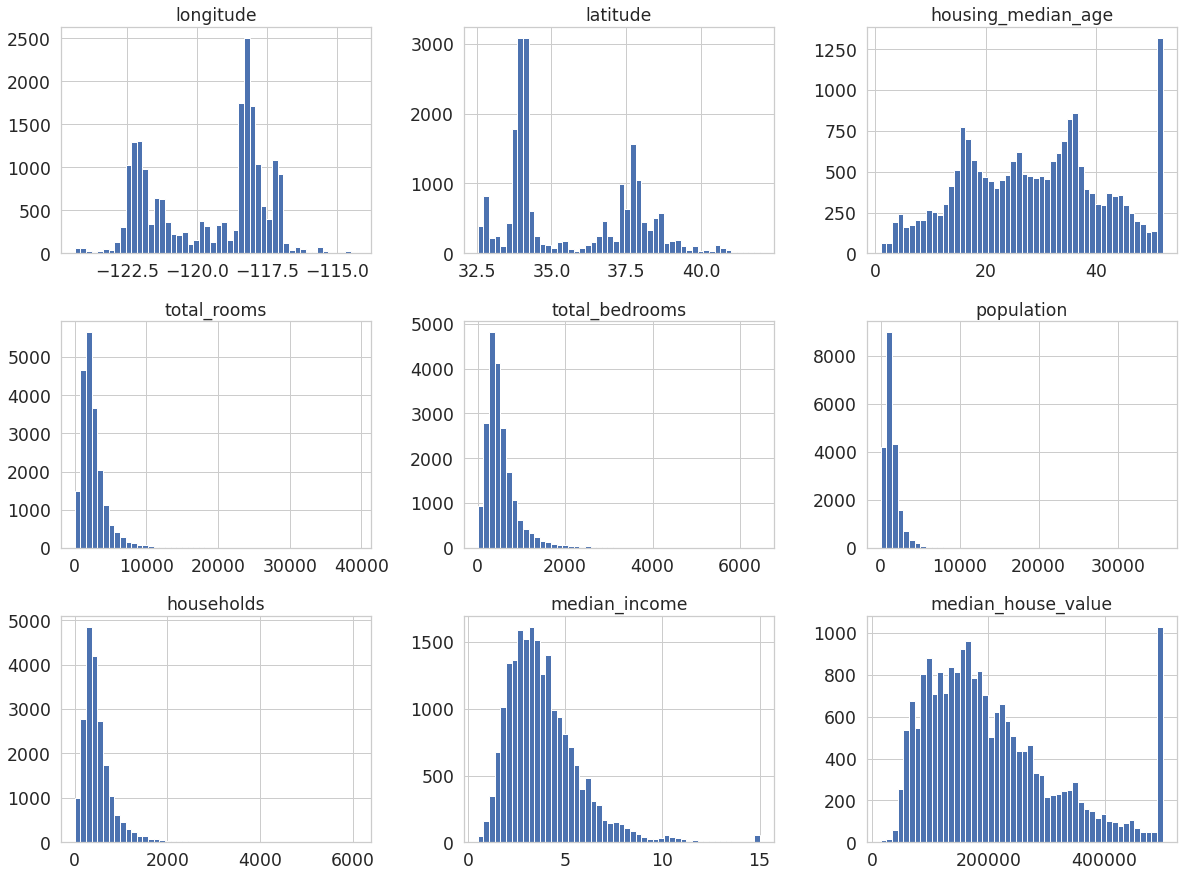

In [7]:
# plot a histogram for each numeric attibute from the dataframe
housing.hist(bins=50, figsize=(20,15))
display()  # just to avoid texts in the notebook output

1. The _median income attribute_ indeed is not expressed in US dollars (USD). After checking with the team that collected the data, you are told that the numbers represent roughly _tens of thousands_ of dollars (_e.g._, 3 actually means about $30,000). <br/>
<table align="left" class="dashed-box">
<tr>
    <td>💡</td>
    <td>Working with preprocessed attributes is common in Machine Learning, and it is not necessarily a problem.</td>
</tr>
</table><br/><br/><br/>

2. The _housing median age_ and _the median house value_ were **capped**. <br/>
<table align="left" class="dashed-box">
<tr>
    <td>⚠️</td>
    <td>Your Machine Learning algorithms may learn that prices never go beyond that limit.</td>
</tr>
<tr>
    <td></td>
    <td>You need to check with your client team to see if this is a problem or not. If they tell you that they need precise predictions even beyond $500,000, then you have two options:</td>
</tr>
<tr>
    <td></td>
    <td>a. Collect proper values for the districts whose prices were capped.</td>
</tr>
<tr>
    <td></td>
    <td>b. Remove those districts from the training and testing sets.</td>
</tr>
</table><br/><br/><br/><br/><br/><br/>

3. These attributes have very _different scales_.
4. Many histograms are _tail-heavy_. This may make it a bit harder for some ML algorithms to detect patterns.
<table align="left" class="dashed-box">
<tr>
    <td>💡</td>
    <td>We will try transforming these attributes in later sprints to have more bell-shaped distributions.</td>
</tr>
</table>

### 2.4. Create a **`Test Set`**
<table align="left" class="dashed-box">
<tr>
    <td><span class='alt-tab'>alt-tab</span></td>
    <td>Splitting a Dataset: Hold-out, random sampling, stratified sampling</td>
</tr>
</table><br/><br/>

_Splitting/sampling_ the dataset into a _training set_ and a ***testing set*** (also called _hold out set_) is crucial for developing of ML solutions. You train your solutions using the _training set_, and you test it using the _testing set_. <br/>
The error rate on new cases is called the **generalization error** (or out-of-sample error), and by evaluating your model on the test set, you get an _estimate_ of this error. <br/>
This value tells you _how well_ your model will perform on instances it has _never seen before_.

Many authors and machine learning practitioners **do not** perform this task _at this stage_ of the ML pipeline. <br/>
They typically use the **entire dataset** for data cleaning, preprocessing, and exploratory data analysis.


For example, when using the **entire dataset** to _impute_ missing values from a specific attribute with its median, one will be _snooping/looking at_ the _future test samples_. <br/>
Consequently, your estimate for the generalization error will be **biased**, and you will launch a system (in production) that _may not_ perform as well as expected. <br/>
This is called ***data snooping bias***. <br/>
Therefore, performing dataset sampling at this stage of the ML pipeline is recommended. <br/>

**OBSERVATIONS:**<br/>
However, there are _some concerns_ with that.

Suppose you have a dataset with 100 samples. <br/>
Initially, you randomly divide it into a **training set** (80 samples) and a **testing set** (20 samples). <br/>
Next, during _data cleaning_, you found out that the _training set_ has **5 samples with missing values** for a given attribute and **5 duplicated samples**. <br/>
Similarly, the _testing set_ has **8 samples with missing values** for the same attribute and **2 duplicated samples**. <br/>
You then decided **to remove _all_ these samples**, resulting in:
- training set with 70 samples
- testing set with 10 samples.

The dataset has changed (80 samples) and, consequently, the _initial proportion_ of the train and test sets too: _80%_ to ___87.5%___ (70/80), and _20%_ to ___12.5%___ (10/80). <br/>
This can impact model training and/or assessment in the _testing set_. <br/>

A _reasonable strategy_ is to perform any _data cleaning tasks_ that **remove samples** -- _e.g._, duplicated samples, samples with missing values, outliers, etc -- across the _entire dataset_ **before** splitting it into. <br/>

<table align="left" class="dashed-box">
<tr>
    <td>💡</td>
    <td>It is common to use 80% of the data for training and 20% for testing. However, this depends on the size of the dataset: if it contains 10 million instances, then holding out 1% means your test set will contain 100,000 instances, probably more than enough to get a good estimate of the generalization error.</td>
</tr>
</table><br/><br/>

### Checking for duplicated samples

In [8]:
housing.duplicated().unique()

array([False])

There are no duplicated samples (rows) in our dataset.

<table align="left" class="dashed-box">
<tr>
    <td>⚠️</td>
    <td>In some cases, we could have a given attribute (column) whose <i>values</i> should be <b>unique</b>; e.g., ID.</td>
</tr>
<tr>
    <td></td>
    <td>Then, one should check if there are <i>multiple samples</i> with <i>the same value</i> — regardless of their other attributes — and decide how to remove the duplicity.</td>
</tr>
</table><br/><br/><br/>

### Checking samples with missing samples

In [9]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


As we identified before (Section 2.3), only the attribute _total_bedrooms_ has missing values. Our strategy here will be _to impute_ a given value (e.g., the median) instead of dropping the samples. <br/><br/>

### Segmenting samples by their `median income`

We will follow the premise from the book that "the _median income_ is a very important attribute to predict _median housing prices_". So, we need to guarantee that training and testing set are _representative_ for that, otherwise we will have ***bias selection***. <br/>
One way to do that is _to group_ the samples according to their _median income_ and perform a **stratified sampling**.

Since we do not have a categorical variable for the _median income_, we can segment the samples by creating groups (_strata_) according to ranges of _median incomes_. <br/>
Let's then check the distribution of the _median income_ to decide the upper and lower bounds of each group.

<AxesSubplot:xlabel='median_income', ylabel='Count'>

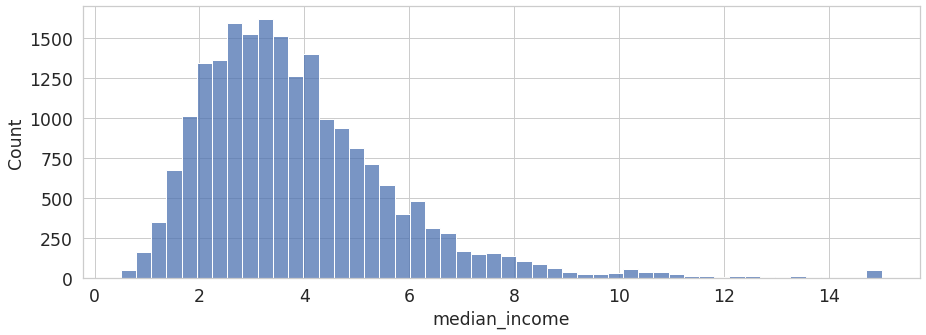

In [10]:
sns.histplot(data=housing, x='median_income', bins=50)

Most median income values are clustered around 1.5 to 6 (i.e., \\$15,000 - \\$60,000), but some median incomes go far beyond 6.

It is important to have a _sufficient number of instances_ in your dataset for each group (_stratum_), or else the estimate of a stratum’s importance may be biased. <br/>
This means that you **should not have too many strata**, and **each stratum should be *large enough***.

We follow the book and consider five intervals to group the samples:
- Group 1: [0, 1.5]
- Group 2: (1.5, 3]
- Group 3: (3, 4.5]
- Group 3: (4.5, 6]
- Group 4: (6, +inf]

In [12]:
housing['median_income']

0        8.3252
1        8.3014
2        7.2574
3        5.6431
4        3.8462
          ...  
20635    1.5603
20636    2.5568
20637    1.7000
20638    1.8672
20639    2.3886
Name: median_income, Length: 20640, dtype: float64

In [14]:
housing['median_income_group'] = pd.cut(housing['median_income'], bins=[0, 1.5, 3, 4.5, 6, np.inf],
                                        labels=[1, 2, 3, 4, 5], include_lowest=True)

In [15]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,median_income_group
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


In [16]:
housing['median_income_group'].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: median_income_group, dtype: int64

In [17]:
# proportional of the groups in the entire dataset
housing['median_income_group'].value_counts() / len(housing['median_income_group'])

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: median_income_group, dtype: float64

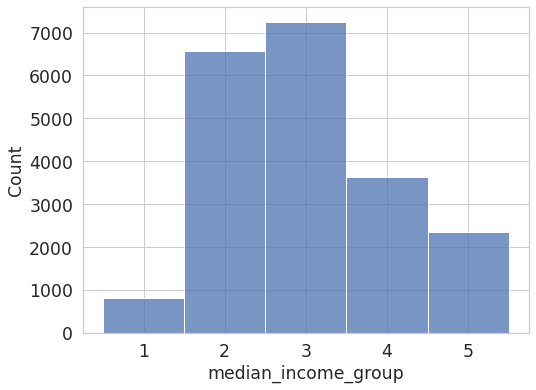

In [18]:
plt.figure(figsize=(8, 6))
sns.histplot(housing['median_income_group'])
plt.grid(True)

### Stratified Sampling

In [19]:
from sklearn.model_selection import train_test_split

housing_train, housing_test = train_test_split(housing, test_size=0.2, stratify=housing['median_income_group'], random_state=42)

In [20]:
housing_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,median_income_group
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN,2
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN,5
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN,2
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND,2
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN,3


In [21]:
housing_train.shape

(16512, 11)

In [22]:
# proportion of the groups in the training set
housing_train['median_income_group'].value_counts() / len(housing_train['median_income_group'])

3    0.350594
2    0.318859
4    0.176296
5    0.114402
1    0.039850
Name: median_income_group, dtype: float64

In [23]:
housing_test.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,median_income_group
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,500001.0,<1H OCEAN,5
10970,-117.86,33.77,39.0,4159.0,655.0,1669.0,651.0,4.6111,240300.0,<1H OCEAN,4
20351,-119.05,34.21,27.0,4357.0,926.0,2110.0,876.0,3.0119,218200.0,<1H OCEAN,3
6568,-118.15,34.20,52.0,1786.0,306.0,1018.0,322.0,4.1518,182100.0,INLAND,3
13285,-117.68,34.07,32.0,1775.0,314.0,1067.0,302.0,4.0375,121300.0,INLAND,3


In [24]:
housing_test.shape

(4128, 11)

In [25]:
# proportion of the groups in the testing set
housing_test['median_income_group'].value_counts() / len(housing_test['median_income_group'])

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: median_income_group, dtype: float64

<table align="left" class="dashed-box">
<tr>
    <td>⚠️</td>
    <td>In <i><b>classification problems,</b></i> it is common to have an <b>imbalance</b> between the classes. If this imbalance is <b>severe</b>, the trained classifier may be <i>biased</i> to the largest classes, even performing <i>stratified sampling</i> and choosing suitable metrics for this scenario.</td>
</tr>
<tr>
    <td></td>
    <td>This can also happen in <i><b>regression problems</b></i> like this one when considering a <i>categorical variable</i> to sample the dataset by stratified sampling.</td>
</tr>
<tr>
    <td></td>
    <td>One possible solution is to perform some data sampling method tailored for imbalanced datasets. See more <a href="https://machinelearningmastery.com/data-sampling-methods-for-imbalanced-classification/">here</a>.</td>
</tr>
</table><br/><br/>

In [26]:
# removing the attribute 'median_income_group'
housing_train = housing_train.drop(columns=['median_income_group'])
housing_test = housing_test.drop(columns=['median_income_group'])

#### **Saving datasets**

In [28]:
# if you want to keep the reference for the row indices from the original dataset, remove the index=False
housing_train.to_csv('../datasets/housing_train_sprint-1.csv', index=False)
housing_test.to_csv('../datasets/housing_test_sprint-1.csv', index=False)

## 🧹 3. Data Cleaning

### 3.1. Missing values

We checked earlier that the `total_bedrooms` attribute has some missing values, so let’s fix this. You have three options:
    
1. Get rid of the corresponding districts. <br/>
<code>housing_train.dropna(subset=["total_bedrooms"])</code>

2. Get rid of the whole attribute. <br/>
<code>housing_train.drop("total_bedrooms", axis=1)</code>

3. Set the values to some value (zero, the mean, the median, etc.). <br/>
<code>median_total_bedrooms = housing_train["total_bedrooms"].median()
housing_train["total_bedrooms"].fillna(median_total_bedrooms, inplace=True)
</code>

To avoid dropping the samples with missing `total_bedrooms`, we will choose *option 3*.

The ***median*** is almost always a good choice since it is not sensitive to outliers. <br/>
However, let us see the distribution of the `total_bedrooms` first.

<AxesSubplot:xlabel='total_bedrooms'>

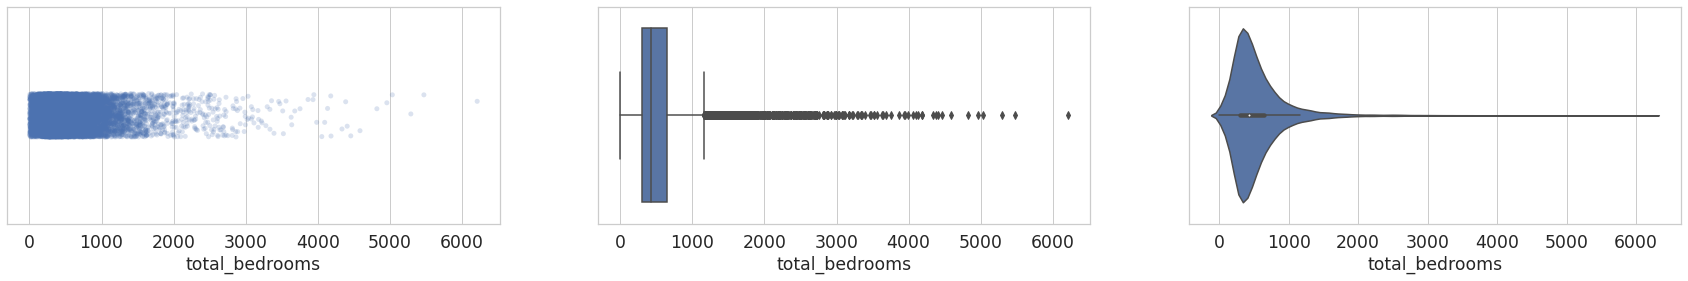

In [29]:
fig, axes = plt.subplots(1, 3, figsize=(30, 4))

sns.stripplot(data=housing_train, x='total_bedrooms', ax=axes[0], alpha=0.2)
sns.boxplot(data=housing_train, x='total_bedrooms', ax=axes[1])
sns.violinplot(data=housing_train, x='total_bedrooms', ax=axes[2])

We have many ***outliers*** for the `total_bedrooms`. However, these outliers seem to be correct — not provided by acquisition errors — since there are many densely populated districts in California (e.g., within Los Angeles), which, consequently, results in more houses and bedrooms in the district. <br/>

Therefore, we will fill in the missing `total_bedrooms` with the <b style='color: red'>median</b> **`total_bedrooms`** of the _training set_. This same median should be used to fill in missing `total_bedrooms` in the **testing set** ➡️ no ***data snooping bias***.

<table align="left" class="dashed-box">
<tr>
    <td>💡</td>
    <td>Using the <b>median <code>total_bedrooms</code></b> of the <b>entire</b> <i>training set</i> is an initial strategy that may be enough to solve this problem.</td>
</tr>
<tr>
    <td></td>
    <td>However, note that the number of bedrooms of small districts (with a small population) will be considered when setting the median for samples from big districts and vice-versa.</td>
</tr>
<tr>
    <td></td>
    <td>The same problem would occur with other features: e.g., the income from rich districts would be considered for filling missing incomes from poor districts (for using all samples to compute the median).</td>
</tr>
<tr>
    <td></td>
    <td>One better alternative could be <i>to group the districts according to their <b>location</b></i> since neighboring districts tend to have <i>similar characteristics.</i></td>
</tr>
<tr>
    <td></td>
    <td>Then, we could compute a <i>median for each group</i>. To fill in the missing value of a given new sample, we would select the median from its group.</td>
</tr>
</table><br/><br/><br/><br/><br/><br/><br/>

In [30]:
housing_train_clean = housing_train.copy()

In [31]:
median_total_bedrooms = housing_train_clean['total_bedrooms'].median()
median_total_bedrooms

433.0

In [32]:
mask_na = housing_train_clean['total_bedrooms'].isnull()
housing_train_clean[mask_na]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,NaN,3296.0,1462.0,2.2708,175000.0,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,NaN,3038.0,727.0,5.1762,264400.0,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,NaN,999.0,386.0,4.6328,287100.0,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,NaN,1039.0,391.0,1.6675,95800.0,INLAND
19252,-122.79,38.48,7.0,6837.0,NaN,3468.0,1405.0,3.1662,191000.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
3376,-118.28,34.25,29.0,2559.0,NaN,1886.0,769.0,2.6036,162100.0,<1H OCEAN
4691,-118.37,34.07,50.0,2519.0,NaN,1117.0,516.0,4.3667,405600.0,<1H OCEAN
6052,-117.76,34.04,34.0,1914.0,NaN,1564.0,328.0,2.8347,115800.0,INLAND
17198,-119.75,34.45,6.0,2864.0,NaN,1404.0,603.0,5.5073,263800.0,NEAR OCEAN


In [33]:
housing_train_clean['total_bedrooms'].fillna(median_total_bedrooms, inplace=True)

In [34]:
housing_train_clean[mask_na]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,433.0,3296.0,1462.0,2.2708,175000.0,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,433.0,3038.0,727.0,5.1762,264400.0,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,433.0,999.0,386.0,4.6328,287100.0,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,433.0,1039.0,391.0,1.6675,95800.0,INLAND
19252,-122.79,38.48,7.0,6837.0,433.0,3468.0,1405.0,3.1662,191000.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
3376,-118.28,34.25,29.0,2559.0,433.0,1886.0,769.0,2.6036,162100.0,<1H OCEAN
4691,-118.37,34.07,50.0,2519.0,433.0,1117.0,516.0,4.3667,405600.0,<1H OCEAN
6052,-117.76,34.04,34.0,1914.0,433.0,1564.0,328.0,2.8347,115800.0,INLAND
17198,-119.75,34.45,6.0,2864.0,433.0,1404.0,603.0,5.5073,263800.0,NEAR OCEAN


In [35]:
housing_train_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   median_house_value  16512 non-null  float64
 9   ocean_proximity     16512 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.4+ MB


<table align="left" class="dashed-box">
<tr>
    <td>⚠️</td>
    <td>We need to save this <b>median value</b> to use it in the <i>testing set</i>.</td>
</tr>
<tr>
    <td></td>
    <td>An alternative to <code>.fillna</code> is to use the <a href="https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html"><code>SimpleImputer</code> from sklearn</a>. We will use it in later sprints.</td>
</tr>
</table><br/><br/>

## 📊 4. Explore the Data
We next perform a _simple exploratory data analysis (EDA)_ to gain insights about the data. <br/>
A more complete EDA with hypotheses about the problem should be further elaborated. 

### 4.1. Visualizing Geographical Data

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

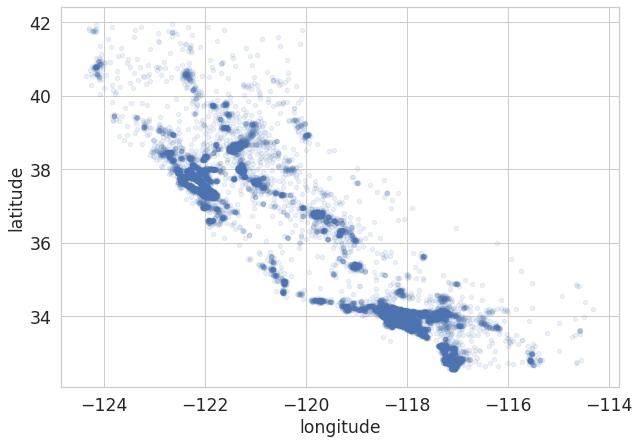

In [36]:
housing_train_clean.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1, figsize=(10, 7))

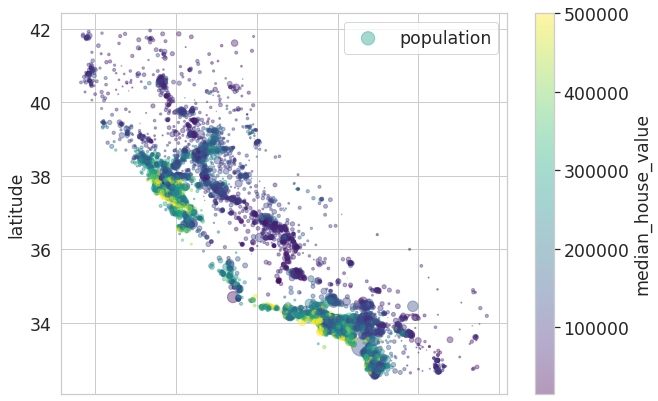

In [37]:
housing_train_clean.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, s=housing_train_clean["population"]/100, label="population", figsize=(10,7), c="median_house_value", cmap=plt.get_cmap("viridis"), colorbar=True)
plt.xlabel('longitude')
plt.legend()

In [38]:
### To install plotly
# pip install plotly
# jupyter labextension install jupyterlab-plotly

### Plotly Maps
# https://plotly.com/python/scattermapbox/
# To plot on Mapbox maps with Plotly you may need a Mapbox account and a public Mapbox Access Token - https://www.mapbox.com/studio

import plotly.express as px

px.set_mapbox_access_token('pk.eyJ1IjoiY2llbmNpYWRlZGFkb3NpZnNwY2FtcGluYXMiLCJhIjoiY2tzcW9sNTRhMGR2bzJ1cGcxNTI1bWppdiJ9.4TJwkUhuLIt-2nH0YudsMg')
fig = px.scatter_mapbox(housing_train_clean, lat="latitude", lon="longitude", color="median_house_value", size="population",
                        color_continuous_scale=px.colors.sequential.Viridis, size_max=15, zoom=5, width=1000, height=800)
fig.show()

ModuleNotFoundError: No module named 'plotly'

Some (obvious) findings:
- There small and big districts (in term of population) close and far from the coast
- The most expensive houses are very close to the coast

### 4.2. Looking for Correlations
The **correlation coefficient** measures the _linear correlation_ between two variables. It ranges from –1 (perfect negative correlation)  to 1 (perfect positive correlation).

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Correlation_examples2.svg/2560px-Correlation_examples2.svg.png' width=800>

Source: https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Correlation_examples2.svg/2560px-Correlation_examples2.svg.png

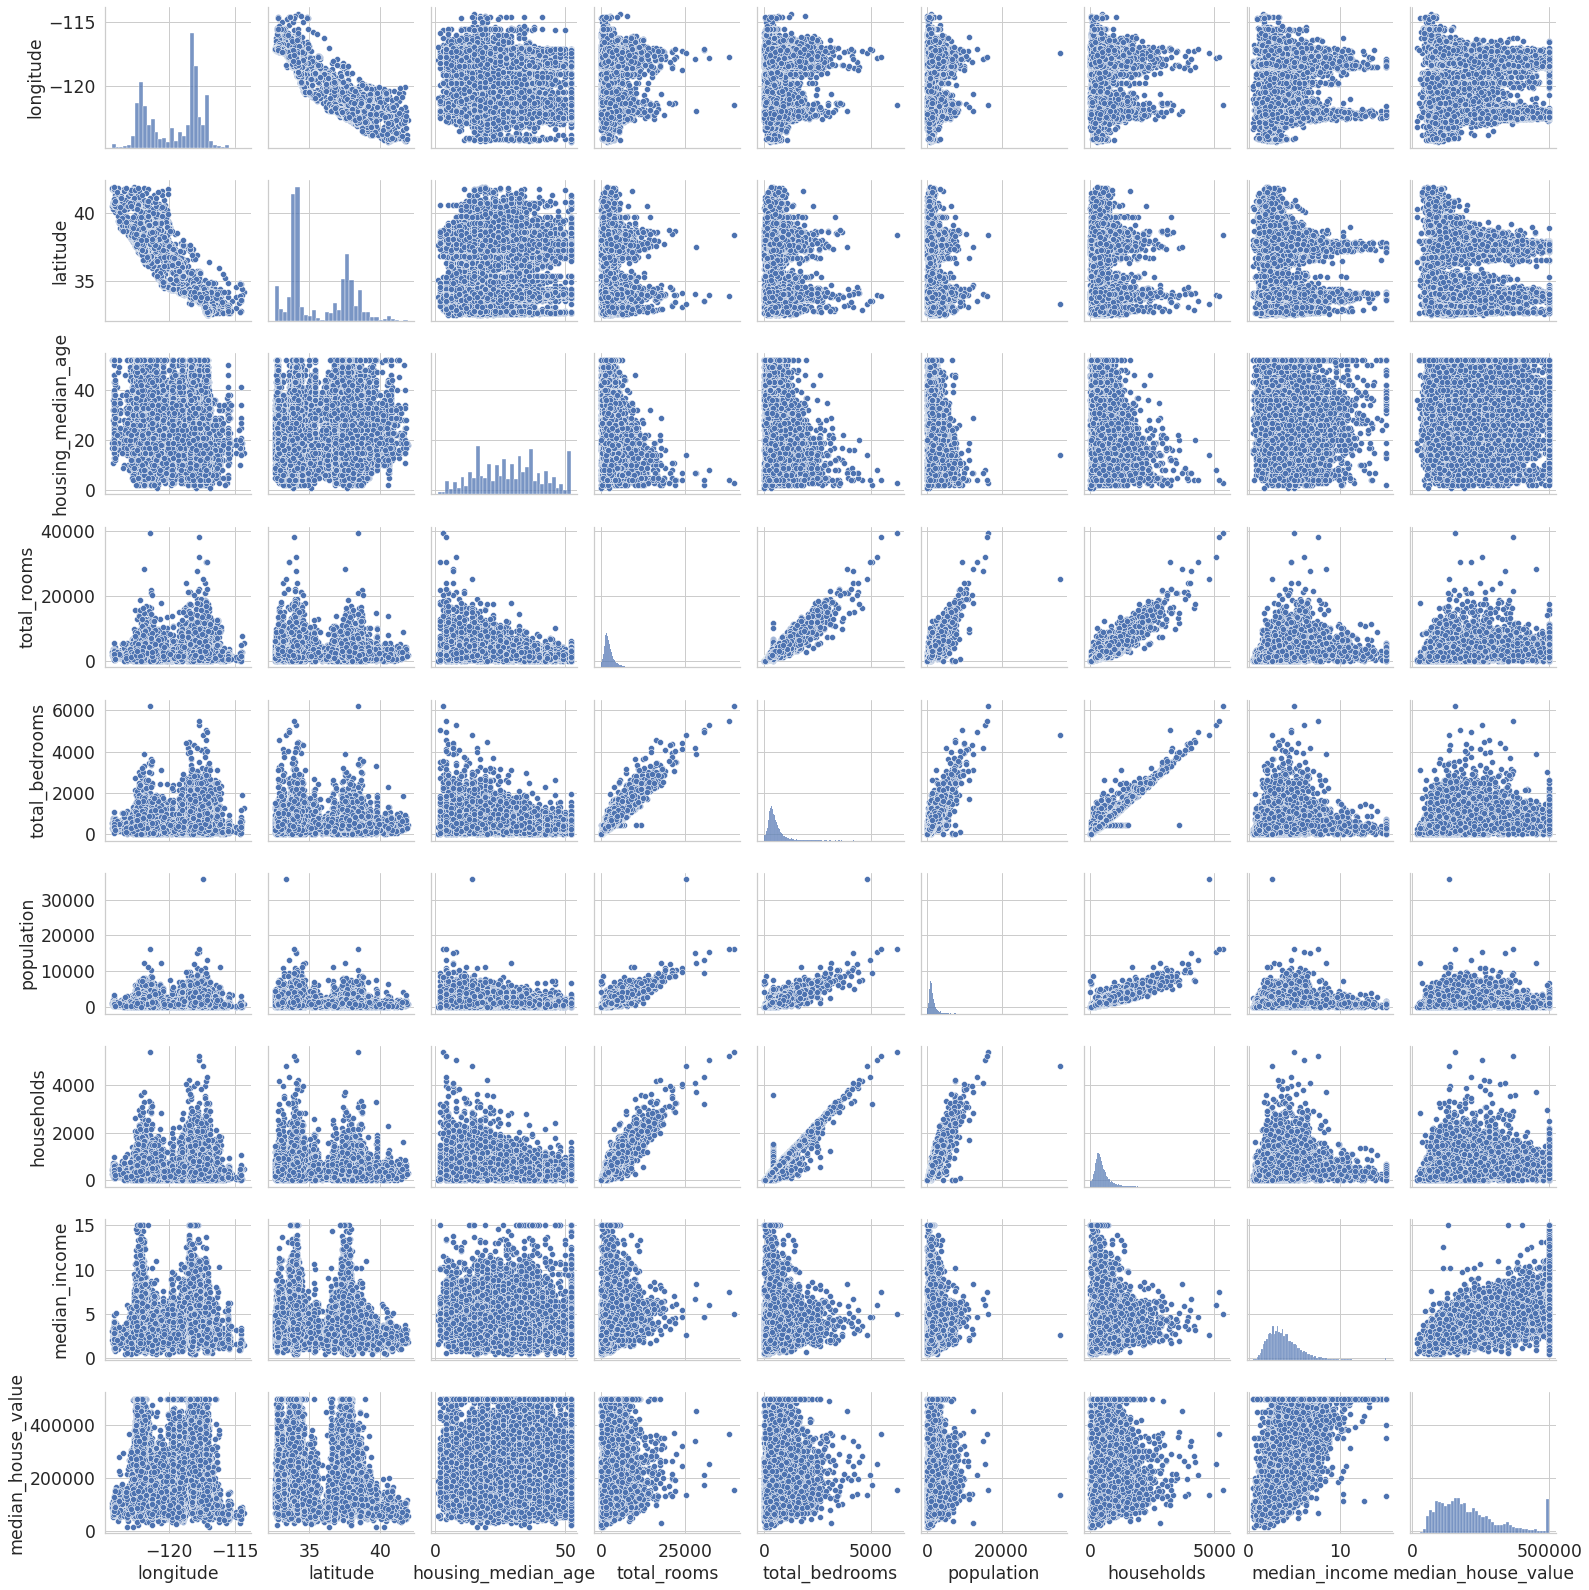

In [39]:
# 9 numeric attributes ==> 9 x 9 = 81 plots
sns.pairplot(data=housing_train_clean)

<ipython-input-40-874b31537df8>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(housing_train_clean.corr(), dtype=np.bool))  # creates a triangular matrix based on the pandas correlation matrix


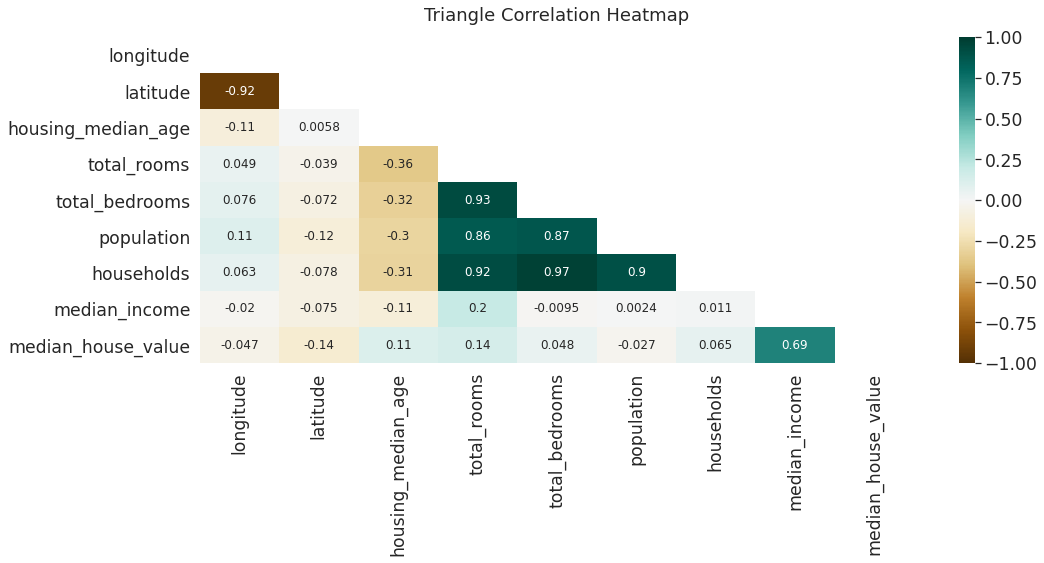

In [40]:
# plotting the correlation coeficients as a heatmap
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(housing_train_clean.corr(), dtype=np.bool))  # creates a triangular matrix based on the pandas correlation matrix

heatmap = sns.heatmap(housing_train_clean.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

In [41]:
housing_train_clean.corr()["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047642
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

The _most promising attribute_ to predict the `median house value` is the **`median income`**, so let’s zoom in on their correlation scatterplot:

<Figure size 1080x576 with 0 Axes>

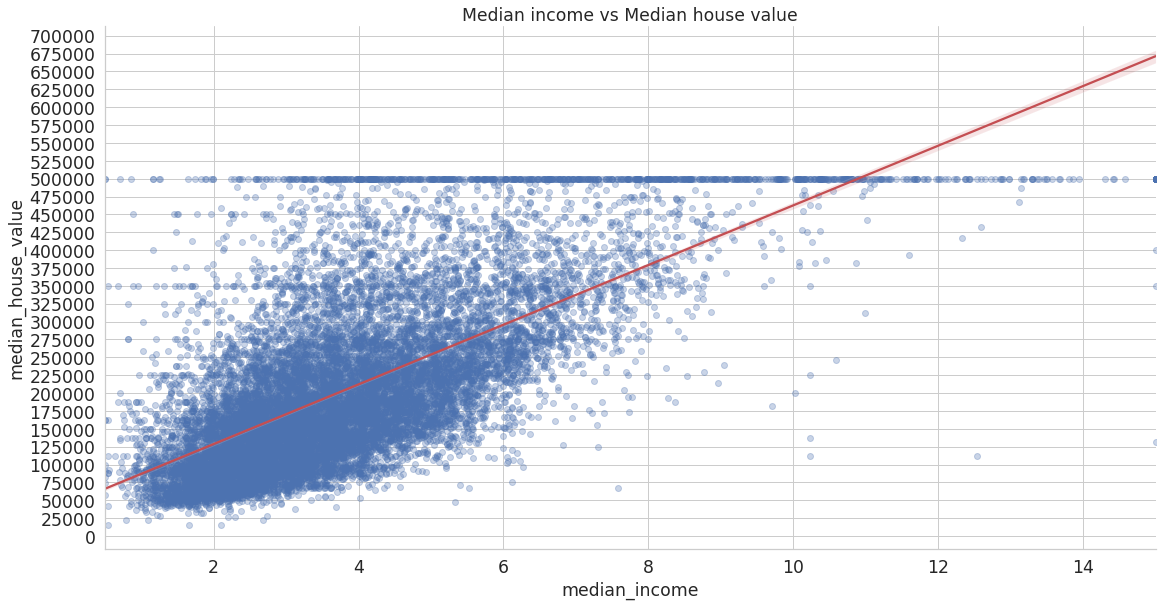

In [42]:
plt.figure(figsize=(15, 8))
sns.lmplot(data=housing_train_clean, x="median_income", y="median_house_value", aspect=2, height=8, scatter_kws={'alpha': 0.3}, line_kws={'color': 'r'})
plt.yticks(range(0, 700001, 25000))
plt.grid(True)
plt.title('Median income vs Median house value')
display()

Some findings:
- The _correlation_ is **strong**: see the regression line and the _upward trend_
- The prices are **capped** at \\$500,000: see the  horizontal line at \\$500,000.
- There is a horizontal line around \\$350,000, another around \\$450,000, perhaps a few more.
  - You may want to try removing the corresponding districts to prevent your algorithms from learning to reproduce these data quirks.
  - For now, we will not remove them.

<table align="left" class="dashed-box">
<tr>
    <td>⚠️</td>
    <td>By looking again at the correlation plots, we can see this <i>capping</i> phenomenon happening in other attributes (e.g., <code>housing_median_age</code>).</td>
</tr>
<tr>
    <td></td>
    <td>You could better analyze these cases and, maybe, remove them.</td>
</tr>
</table><br/><br/>

### 4.3. Data distribution

In [43]:
housing_train_clean.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [44]:
numeric_attributes = housing_train_clean.columns.drop('ocean_proximity')
numeric_attributes

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [45]:
len(numeric_attributes)

9

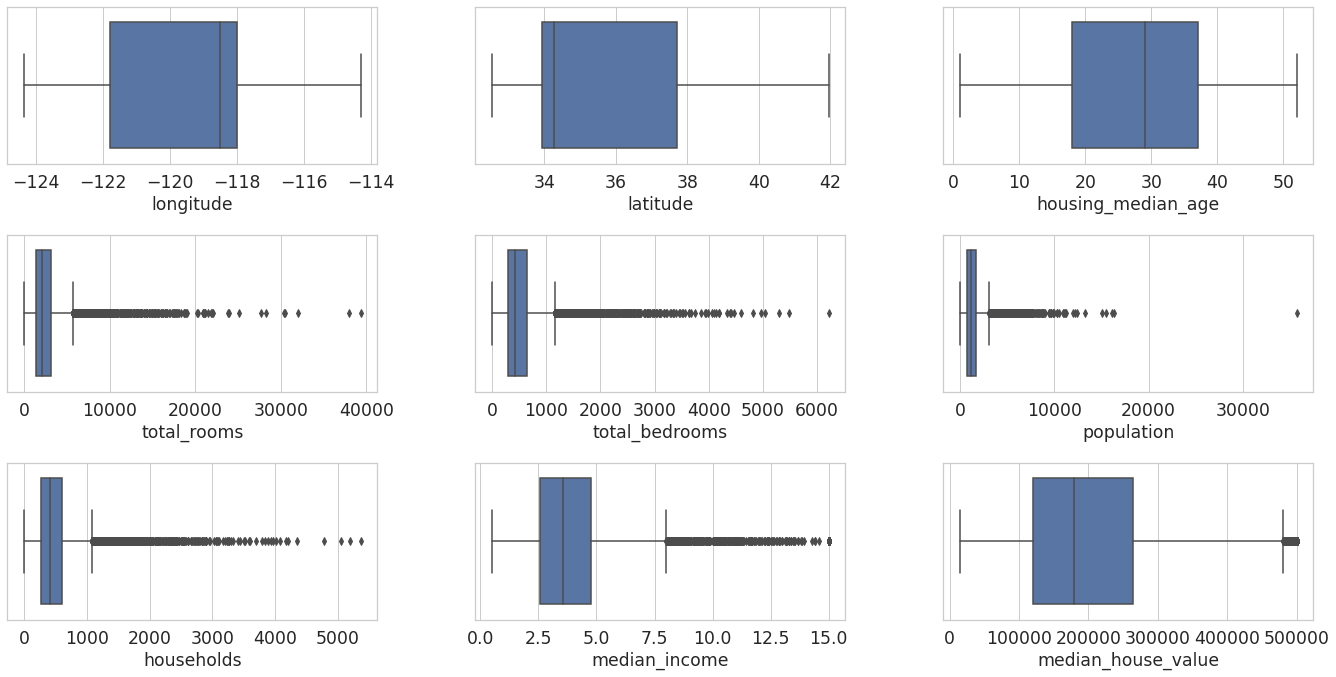

In [46]:
fig, axes = plt.subplots(3, 3, figsize=(20, 10))
fig.tight_layout(pad=3.0)

for i, attr in enumerate(numeric_attributes):
    row = i // 3
    col = i % 3
    sns.boxplot(data=housing_train_clean, x=attr, ax=axes[row, col])


We can see that 6 attributes have many _outliers_. However, we **will not** remove them because _they do not seem to be noise_.

For example, a large and populous city (e.g., San Francisco) has several districts, with several houses and, consequently, many rooms and bedrooms. We can see the correlation between 'population' and these attributes. <br/>
Also, some cities in California have big markets, such as cinema and IT, where the incomes tend to be higher.

Let's visualize the location of the districts with _outliers_ for the `median income` (those >= 8).

In [47]:
px.set_mapbox_access_token('pk.eyJ1IjoiY2llbmNpYWRlZGFkb3NpZnNwY2FtcGluYXMiLCJhIjoiY2tzcW9sNTRhMGR2bzJ1cGcxNTI1bWppdiJ9.4TJwkUhuLIt-2nH0YudsMg')

fig = px.scatter_mapbox(housing_train_clean[housing_train_clean['median_income'] >= 8], lat="latitude", lon="longitude", color="median_house_value", size="population",
                        color_continuous_scale=px.colors.sequential.Viridis, size_max=15, zoom=5, width=1000, height=800)
fig.show()

NameError: name 'px' is not defined

In [48]:
# Zoom in the stats for the target outcome
housing_train_clean['median_house_value'].describe()

count     16512.000000
mean     206990.920724
std      115703.014830
min       14999.000000
25%      119800.000000
50%      179500.000000
75%      263900.000000
max      500001.000000
Name: median_house_value, dtype: float64

## 🛠️ 5. Prepare the Data

In [49]:
housing_train_clean.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN


#### **Separating the independent variables (features) and the _dependent variable_ (target outcome)**

Since we do not necessarily want to apply the same transformations to the features and the target outcome, let's separate them.

In [50]:
housing_train_pre = housing_train_clean.drop(columns=['median_house_value'])
housing_train_target = housing_train_clean['median_house_value'].copy()

<table align="left" class="dashed-box">
<tr>
    <td>💡</td>
    <td>This separation could also happen before <i>data cleaning</i> to isolate the transformations only on the <i>training features.</i></td>
</tr>
<tr>
    <td></td>
    <td>However, there are some concerns. First, if you have samples with <i>missing values</i> for any <i>feature</i> and you decide <b>to drop</b> these samples, you <b>must drop</b> the corresponding ones in the <i>target outcome</i> to keep the number of instances consistent, and vice-versa.</td>
</tr>
</table><br/><br/>

<table align="left" class="dashed-box">
<tr>
    <td>⚠️</td>
    <td>Remember to merge the <i>features</i> and the <i>target outcome</i> into a single dataframe before saving it to disk.</td>
</tr>
</table><br/><br/>

### 5.1. Categorical Variabel Encoding
We have a single _categorical variable_ (`ocean_proximity`) to encode. For that, let's use the [**One Hot Encoding** strategy](https://towardsdatascience.com/all-about-categorical-variable-encoding-305f3361fd02): a new binary variable/column (**dummy variable**) is added for each _category_ from the variable.<br/>

In [51]:
# one hot encoding by pandas
housing_train_pre = pd.get_dummies(data=housing_train_pre, columns=['ocean_proximity'])
housing_train_pre.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,1,0,0,0,0
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,1,0,0,0,0
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,0,0,0,0,1
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,0,1,0,0,0
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,1,0,0,0,0


<table align="left" class="dashed-box">
<tr>
    <td>⚠️</td>
    <td>To work properly, we should perform the method <code>.get_dummies()</code> for the <b>entire dataset</b>, and <i>not only</i> for the <b>training set</b>. The reason is that this function will create a new column (<i>dummy variable</i>) for each value in the target categorical variable.</td>
</tr>
<tr>
    <td></td>
    <td>If the categorical variable contains <b>a different number of values</b> in the <i>training set</i> and <i>testing set</i>, the encoding <b>will not be consistent:</b> the number of dummy variables will be different.</td>
</tr>
<tr>
    <td></td>
    <td>An alternative is to use the <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html"><code>OneHotEncoder</code> from sklearn</a>. We will use it in the later sprints.</td>
</tr>
</table><br/><br/>

<table align="left" class="dashed-box">
<tr>
    <td>⚠️</td>
    <td>When incorporating <b>dummy variables</b> in <i><b>regression</b> algorithms</i>, we should be careful with the <b><i>dummy variable trap</i></b>.</td>
</tr>
<tr>
    <td></td>
    <td>The <b><i>dummy variable trap</i></b> occurs when <i>two or more dummy variables</i> created by one-hot encoding are <i>highly correlated</i> (<b>multi-collinear</b>). This means that one variable can be predicted from the others, making it difficult to interpret predicted coefficient variables in regression models (<a href="https://www.learndatasci.com/glossary/dummy-variable-trap/#:~:text=machine%20learning%20courses.-,What%20is%20the%20Dummy%20Variable%20Trap%3F,coefficient%20variables%20in%20regression%20models.">source</a>).</td>
</tr>
<tr>
    <td></td>
    <td>To overcome the dummy variable trap, we just <b>drop one</b> of the <i>dummy variables (column)</i>: <code>.get_dummies(drop_first=True)</code>. This can be done because the <i>dummy variables</i> include <i>redundant information</i>.</td>
</tr>
<tr>
    <td></td>
    <td>Apparently, most methods in sklearn deal with this problem, so we need to do nothing (<i>not sure about it</i>).</td>
</tr>
</table><br/><br/>

<table align="left" class="dashed-box">
<tr>
    <td>💡</td>
    <td>If a categorical attribute has a <b>large number of possible categories</b> (e.g., country code, profession, species), then <i>one-hot encoding</i> will result in <i>a large number of input features</i>. This may slow down training and degrade performance.<br/> If this happens, we have some alternatives:</td>
</tr>
<tr>
    <td></td>
    <td><b>1)</b> Replace the <b>categorical input</b> with useful <i><b>numerical features related to the categories</b></i>. <br/> For example, you could replace the <code>ocean_proximity</code> feature with the <i>distance to the ocean</i>.<br/> Similarly, a <code>country code</code> could be replaced with the <i>country’s population and GDP per capita</i>).</td>
</tr>
<tr>
    <td></td>
    <td><b>3)</b> Create <i>another categorical variable</i> that <b>groups the target categories</b> into <i>high-level ones</i>. <br/> For example, you could use consider the continent instead of the country.<br/>However, the higher the abstraction, the greater the loss of information of the original categorical variable.</td>
</tr>
<tr>
    <td></td>
    <td><b>3)</b> Replace each category with a learnable, low-dimensional vector called an <i>embedding</i>. <br/> Each category’s representation would be learned during training. <br/> This is an example of <i>representation learning</i>.</td>
</tr>
</table><br/><br/>

<table align="left" class="dashed-box">
<tr>
    <td>💡</td>
    <td>We can evaluate different tasks for <i>data cleaning</i> and/or <i>data preparation</i> and check <b>which are the best (or the best combination)</b> for our data.</td>        
</tr>
<tr>
    <td></td>
    <td>For this purpose, we treat theses tasks as <i>hyperparameters</i> and <b>fine-tune them / hyperparameter optimization</b> (e.g., <i>grid search</i>). <br/> We may <i>automatically</i> find the best way to handle outliers, missing features, feature selection, etc.</td>
</tr>
<tr>
    <td></td>
    <td>We will study and use fine-tunning approaches in later sprints.</td>
</tr>
</table><br/><br/>

#### **Saving the pre-processed training set**

In [52]:
housing_train_pre_saving = housing_train_pre.copy()
housing_train_pre_saving['median_house_value'] = housing_train_target
housing_train_pre_saving.to_csv('../datasets/housing_train_pre_sprint-1.csv', index=False)

In [53]:
housing_train_pre.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,1,0,0,0,0
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,1,0,0,0,0
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,0,0,0,0,1
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,0,1,0,0,0
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,1,0,0,0,0


## 🏋️‍♀️ 6. Train ML Algorithms
In this step, we should train _many_ quick-and-dirty models — with _default values_ for their hyperparameters — from different categories. <br/>
We then _measure the performance_ on the **training set** and shortlist the _top three to five_ **most promising models**.

However, we will only select _one model_ in this sprint — **Linear Regression** — for teaching purposes. We will try new ones in later sprints.

<table align="left" class="dashed-box">
<tr>
    <td><span class='alt-tab'>alt-tab</span></td>
    <td>See the definition and concepts about Linear Regresion in the external presentation.</td>
</tr>
</table><br/><br/>

- [Slides: Linear Regression and Gradient Descent](../../../../../slides/20210902-D2APR-aula03-linear_regression.pdf)

### 6.1. Getting the independent (features) and dependent variables (outcome)
Before training our models, we want to convert the DataFrame and Series for numpy arrays. <br/>
This is not necessarily on this case since the sklearn models can deal with pandas structures.

However, since we will use sklearn transformers in the future, whose outputs will be numpy arrays, let's consider numpy right now.

Just to keep the standard notation of the ML community, let's use **X** for numpy *feature matrix* and **y** for a numpy array of *labels/outcomes*.

In [71]:
# Usando array numpy
X_train = housing_train_pre.values
y_train = housing_train_target.values

### 6.1. Training the Models

In [72]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression() # hiperparâmetros default

# Training
lin_reg.fit(X_train, y_train)

LinearRegression()

### 6.3. Evaluating on the Training Set

### **Prediction**

In [73]:
y_train_pred = lin_reg.predict(X_train)

### **Metrics**

##### **Coefficient of Determination - R²**
The proportion of _variation_ in the dependent variable (outcome) that is explained by the predictor variables (regression, in this case). <br/>
R² can be interpreted as the percent of variance in our dependent variable that can be explained by our model. <br/>
R² checks how much the regression line fits the data

$$R^2(y, \hat{y}) = 1 - \frac {\sum_{i=0}^{n-1}(y^{(i)}-\hat{y}^{(i)})^2}{\sum_{i=0}^{m-1}(y^{(i)}-\bar{y})^2}$$

##### **Root Mean Squared Error (RMSE)**

$$RMSE = \sqrt{MSE} = \sqrt{\frac{\sum_{i=0}^{m-1}(y^{(i)}-\hat{y}^{(i)})^2}{m}}$$

#### **Evaluation**

In [77]:
r2_score = lin_reg.score(X_train, y_train)
print(f'R² score = {r2_score}')

R² score = 0.643814145843141


In [78]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(y_train, y_train_pred, squared=False)
print(f'RMSE = {rmse}')

RMSE = 69050.98178244587


This initial result is not too bad, but clearly not a great score: most districts’ `median_housing_values` approximately range between \\$120,000 (Q1) and $265,000 (Q3), so a typical **prediction error** of \\$69,050 may not be very satisfying. <br/>

This is an example of a **model *underfitting*** the training data. When this happens it can mean that the _features_ **do not** provide enough information to make good predictions, or that the model is not powerful enough.

<table align="left" class="dashed-box">
<tr>
    <td><span class='alt-tab'>alt-tab</span></td>
    <td>Slides: Overfitting vs Underfitting.</td>
</tr>
</table><br/><br/>

- [Slides: ML concepts](../../../../../slides/20210902-D2APR-aula03-ML_concepts.pdf)

<table align="left" class="dashed-box">
<tr>
    <td>💡</td>
    <td>The main ways <b>to fix <i>underfitting</i></b> are: <br/>
        - To select a more powerful model;<br/>
        - To feed the training algorithm with better features; or <br/>
        - To reduce the constraints on the model (foregularized models).</td>        
</tr>
</table><br/><br/>

### **Visual Analysis**

##### **Prediction vs Real**

Text(0.5, 1.0, 'Median housing value - Prediction vs Real')

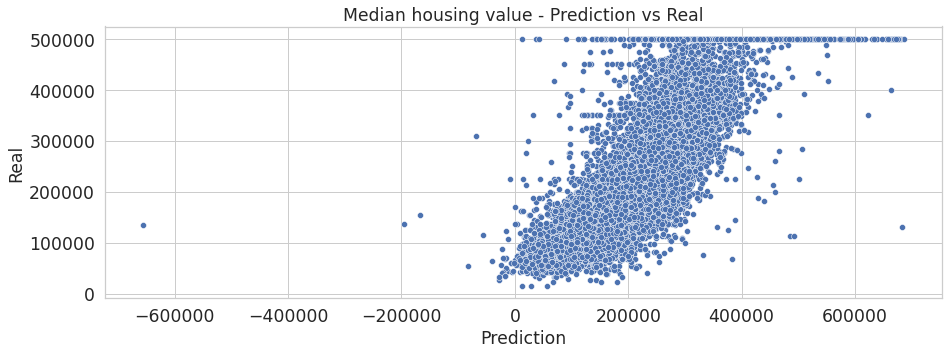

In [79]:
sns.scatterplot(x=y_train_pred, y=y_train)
plt.xlabel('Prediction')
plt.ylabel('Real')
plt.title('Median housing value - Prediction vs Real')

##### **Residual Analysis**
Plot of Prediction vs Residual. This analysis is interesting because we can detect if we meet the assumption of **homoscedasticity**.

<img src='../imgs/residual-analysis.png' width=600/>

In [80]:
residual = y_train - y_train_pred

Text(0.5, 1.0, 'Median housing value - Prediction vs Residual')

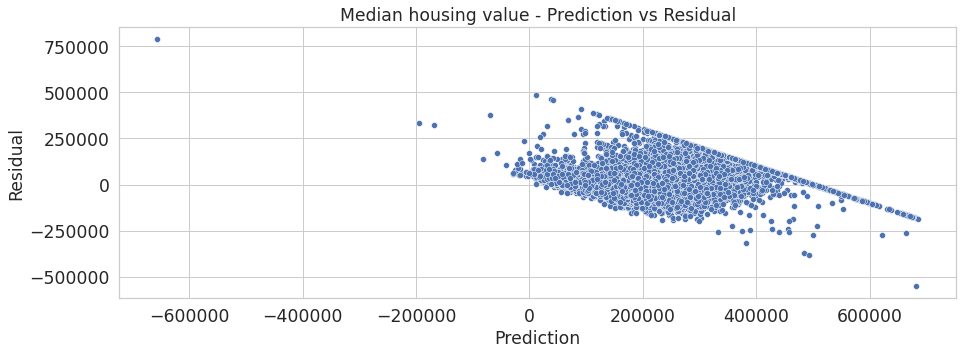

In [81]:
sns.scatterplot(x=y_train_pred, y=residual)
plt.xlabel('Prediction')
plt.ylabel('Residual')
plt.title('Median housing value - Prediction vs Residual')

Our model **does not** meet the **homoscedasticity**. It seems that the residual is correlated to the prediction values (see the trend). <br/>
Also, see strange behavior with the *top diagonal*. It is very likely to be caused by the capped house ages and prices. We need to treat them.

When violating _homoscedasticity_, you may want to do some work on your input data:
- Maybe you have some variables to add or remove;
- Another solution is to do transformations (e.g,. logarithmic or square root transformation).

<AxesSubplot:ylabel='Count'>

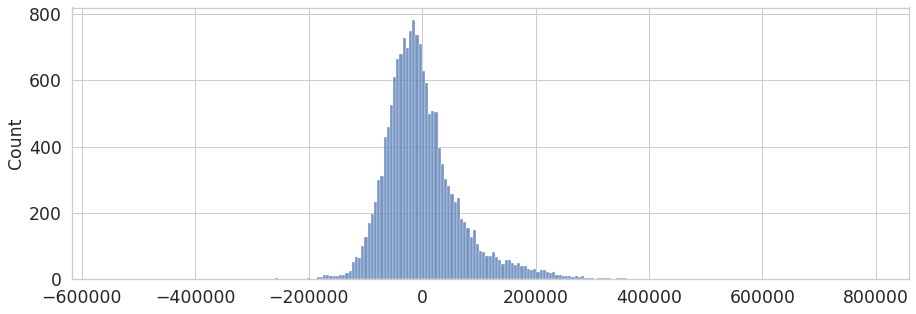

In [82]:
sns.histplot(residual)

The residual roghly follows a _normal distribution_.

## Some strategies to improve the model
- Adding or remove features
- Cleaning up outliers
- Apply transformations
- Try other models/algorithms (mainly nonlinear)